In [29]:
import pandas as pd
import numpy as py
school_data = pd.read_csv('csvFiles/MA_Public_Schools_2017.csv')

# show all of the columns
from IPython.display import display
pd.options.display.max_columns = None
display(school_data.head())

,School Code,School Name,School Type,Function,Contact Name,Address 1,Address 2,Town,State,Zip,Phone,Fax,Grade,District Name,District Code,PK_Enrollment,K_Enrollment,1_Enrollment,2_Enrollment,3_Enrollment,4_Enrollment,5_Enrollment,6_Enrollment,7_Enrollment,8_Enrollment,9_Enrollment,10_Enrollment,11_Enrollment,12_Enrollment,SP_Enrollment,TOTAL_Enrollment,First Language Not English,% First Language Not English,English Language Learner,% English Language Learner,Students With Disabilities,% Students With Disabilities,High Needs,% High Needs,Economically Disadvantaged,% Economically Disadvantaged,% African American,% Asian,% Hispanic,% White,% Native American,"% Native Hawaiian, Pacific Islander","% Multi-Race, Non-Hispanic",% Males,% Females,Total # of Classes,Average Class Size,Number of Students,Salary Totals,Average Salary,FTE Count,In-District Expenditures,Total In-district FTEs,Average In-District Expenditures per Pupil,Total Expenditures,Total Pupil FTEs,Average Expenditures per Pupil,# in Cohort,% Graduated,% Still in School,% Non-Grad Completers,% GED,% Dropped Out,% Permanently Excluded,High School Graduates (#),Attending Coll./Univ. (#),% Attending College,% Private Two-Year,% Private Four-Year,% Public Two-Year,% Public Four-Year,% MA Community College,% MA State University,% UMass,AP_Test Takers,AP_Tests Taken,AP_One Test,AP_Two Tests,AP_Three Tests,AP_Four Tests,AP_Five or More Tests,AP_Score=1,AP_Score=2,AP_Score=3,AP_Score=4,AP_Score=5,% AP_Score 1-2,% AP_Score 3-5,SAT_Tests Taken,Average SAT_Reading,Average SAT_Writing,Average SAT_Math,MCAS_3rdGrade_Math_P+A #,% MCAS_3rdGrade_Math_P+A,MCAS_3rdGrade_Math_A #,% MCAS_3rdGrade_Math_A,MCAS_3rdGrade_Math_P #,% MCAS_3rdGrade_Math_P,MCAS_3rdGrade_Math_NI #,% MCAS_3rdGrade_Math_NI,MCAS_3rdGrade_Math_W/F #,% MCAS_3rdGrade_Math_W/F,MCAS_3rdGrade_Math_Stud. Incl. #,MCAS_3rdGrade_Math_CPI,MCAS_3rdGrade_Math_SGP,MCAS_3rdGrade_Math_Incl. in SGP(#),MCAS_4thGrade_Math_P+A #,% MCAS_4thGrade_Math_P+A,MCAS_4thGrade_Math_A #,% MCAS_4thGrade_Math_A,MCAS_4thGrade_Math_P #,% MCAS_4thGrade_Math_P,MCAS_4thGrade_Math_NI #,% MCAS_4thGrade_Math_NI,MCAS_4thGrade_Math_W/F #,% MCAS_4thGrade_Math_W/F,MCAS_4thGrade_Math_Stud. Incl. #,MCAS_4thGrade_Math_CPI,MCAS_4thGrade_Math_SGP,MCAS_4thGrade_Math_Incl. in SGP(#),MCAS_5thGrade_Math_P+A #,% MCAS_5thGrade_Math_P+A,MCAS_5thGrade_Math_A #,% MCAS_5thGrade_Math_A,MCAS_5thGrade_Math_P #,% MCAS_5thGrade_Math_P,MCAS_5thGrade_Math_NI #,% MCAS_5thGrade_Math_NI,MCAS_5thGrade_Math_W/F #,% MCAS_5thGrade_Math_W/F,MCAS_5thGrade_Math_Stud. Incl. #,MCAS_5thGrade_Math_CPI,MCAS_5thGrade_Math_SGP,MCAS_5thGrade_Math_Incl. in SGP(#),MCAS_6thGrade_Math_P+A #,% MCAS_6thGrade_Math_P+A,MCAS_6thGrade_Math_A #,% MCAS_6thGrade_Math_A,MCAS_6thGrade_Math_P #,% MCAS_6thGrade_Math_P,MCAS_6thGrade_Math_NI #,% MCAS_6thGrade_Math_NI,MCAS_6thGrade_Math_W/F #,% MCAS_6thGrade_Math_W/F,MCAS_6thGrade_Math_Stud. Incl. #,MCAS_6thGrade_Math_CPI,MCAS_6thGrade_Math_SGP,MCAS_6thGrade_Math_Incl. in SGP(#),MCAS_7thGrade_Math_P+A #,% MCAS_7thGrade_Math_P+A,MCAS_7thGrade_Math_A #,% MCAS_7thGrade_Math_A,MCAS_7thGrade_Math_P #,% MCAS_7thGrade_Math_P,MCAS_7thGrade_Math_NI #,% MCAS_7thGrade_Math_NI,MCAS_7thGrade_Math_W/F #,% MCAS_7thGrade_Math_W/F,MCAS_7thGrade_Math_Stud. Incl. #,MCAS_7thGrade_Math_CPI,MCAS_7thGrade_Math_SGP,MCAS_7thGrade_Math_Incl. in SGP(#),MCAS_8thGrade_Math_P+A #,% MCAS_8thGrade_Math_P+A,MCAS_8thGrade_Math_A #,% MCAS_8thGrade_Math_A,MCAS_8thGrade_Math_P #,% MCAS_8thGrade_Math_P,MCAS_8thGrade_Math_NI #,% MCAS_8thGrade_Math_NI,MCAS_8thGrade_Math_W/F #,% MCAS_8thGrade_Math_W/F,MCAS_8thGrade_Math_Stud. Incl. #,MCAS_8thGrade_Math_CPI,MCAS_8thGrade_Math_SGP,MCAS_8thGrade_Math_Incl. in SGP(#),MCAS_10thGrade_Math_P+A #,% MCAS_10thGrade_Math_P+A,MCAS_10thGrade_Math_A #,% MCAS_10thGrade_Math_A,MCAS_10thGrade_Math_P #,% MCAS_10thGrade_Math_P,MCAS_10thGrade_Math_NI #,% MCAS_10thGrade_Math_NI,MCAS_10thGrade_Math_W/F #,% MCAS_10thGrade_Math_W/F,MCAS_10thGrade_Math_Stud. Incl. #,MCAS_10thGrade_Mat

In [30]:
school_data['School Type'].unique()

array(['Public School', 'Charter School'], dtype=object)

# Only high schools in Massachusetts and Boston

In [31]:
useful_cols = ['School Name','School Type','Town', 'Zip','Grade','% First Language Not English','% English Language Learner','% Students With Disabilities','% Economically Disadvantaged','% African American','% Asian','% Hispanic','% White','% Native Hawaiian, Pacific Islander','% Multi-Race, Non-Hispanic','% Males','% Females','Total # of Classes','Average Class Size','% Attending College','% Private Two-Year','% Private Four-Year','% Public Two-Year','% Public Four-Year','% MA Community College','% AP_Score 1-2','% AP_Score 3-5','Average SAT_Reading','Average SAT_Writing','Average SAT_Math','Average Salary']
school_data= school_data[useful_cols]


#removing schools without SAT data
school_data = school_data.dropna(subset= ['Average SAT_Reading'])

# concat Total SAT Scores
school_data['Total SAT'] = school_data['Average SAT_Reading'] +school_data['Average SAT_Writing'] + school_data['Average SAT_Math']
#school_data.head()



In [32]:
# only the high schools in Massachussetts

high_schools = school_data[school_data['Grade'].str.contains('09,10,11,12', na=False)]

from IPython.display import display
pd.options.display.max_columns = None
display(high_schools.head())


,School Name,School Type,Town,Zip,Grade,% First Language Not English,% English Language Learner,% Students With Disabilities,% Economically Disadvantaged,% African American,% Asian,% Hispanic,% White,"% Native Hawaiian, Pacific Islander","% Multi-Race, Non-Hispanic",% Males,% Females,Total # of Classes,Average Class Size,% Attending College,% Private Two-Year,% Private Four-Year,% Public Two-Year,% Public Four-Year,% MA Community College,% AP_Score 1-2,% AP_Score 3-5,Average SAT_Reading,Average SAT_Writing,Average SAT_Math,Average Salary,Total SAT
0,Abington High,Public School,Abington,2351,"09,10,11,12",5.3,2.4,9.7,21.5,2.2,1.5,9.1,85.8,0.2,0.9,45.6,54.4,204.0,15.8,75.8,1.1,22.3,30.9,45.7,30.9,43.9,56.1,520.0,498.0,516.0,74662.0,1534.0
8,Agawam High,Public School,Agawam,1001,"09,10,11,12",4.6,1.3,14.1,22.7,1.2,2.2,5.8,88.8,0.1,1.9,52.0,48.0,590.0,16.8,81.6,0.0,34.5,34.0,31.5,33.2,33.6,66.4,496.0,475.0,514.0,64769.0,1485.0
16,Amesbury High,Public School,Amesbury,1913,"09,10,11,12",2.9,0.5,17.0,14.6,1.3,1.2,4.2,90.7,0.0,2.5,53.5,46.5,380.0,16.7,72.6,0.0,24.4,35.6,40.0,35.6,19.0,81.0,531.0,518.0,534.0,77147.0,1583.0
23,Andover High,Public School,Andover,1810,"09,10,11,12",9.5,0.8,16.1,6.3,1.9,14.5,5.0,76.3,0.0,2.2,48.9,51.1,1160.0,14.7,89.3,0.0,56.4,7.6,36.0,7.3,21.9,78.1,566.0,562.0,581.0,81211.0,1709.0
33,Arlington High,Public School,Arlington,2476,"09,10,11,12",12.4,0.9,11.1,10.3,4.1,10.7,5.7,75.6,0.2,3.7,49.1,50.9,682.0,14.3,85.0,0.0,53.5,9.6,36.9,8.5,13.9,86.1,581.0,576.0,592.0,66493.0,1749.0


In [78]:
# only high schools in Boston
boston_zip= ("02108 02109 02110 02111 02113 02114 02115 02116 02118 02119 02120 02121 02122 02124 02125 02126 02127 02128 02129 02130 02131 02132 02133 02134 02135 02136 02163 02199 02203 02210 02215 02222")
boston_zip = [int(number) for number in boston_zip.split(' ')]
school_data['Zip'] = school_data['Zip'].astype(int)

boston_schools = high_schools.loc[high_schools['Zip'].isin(boston_zip)]
boston_schools.head()

,School Name,School Type,Town,Zip,Grade,% First Language Not English,% English Language Learner,% Students With Disabilities,% Economically Disadvantaged,% African American,% Asian,% Hispanic,% White,"% Native Hawaiian, Pacific Islander","% Multi-Race, Non-Hispanic",% Males,% Females,Total # of Classes,Average Class Size,% Attending College,% Private Two-Year,% Private Four-Year,% Public Two-Year,% Public Four-Year,% MA Community College,% AP_Score 1-2,% AP_Score 3-5,Average SAT_Reading,Average SAT_Writing,Average SAT_Math,Average Salary,Total SAT
115,Another Course To College,Public School,Hyde Park,2136,"09,10,11,12",48.0,17.0,22.0,61.4,43.0,5.8,39.9,7.2,0.4,3.1,49.3,50.7,101.0,16.8,81.4,0.0,42.9,25.7,31.4,25.7,94.4,5.6,377.0,395.0,407.0,88790.0,1179.0
120,Boston Arts Academy,Public School,Boston,2215,"09,10,11,12",35.8,4.5,13.4,43.6,40.5,4.5,39.4,12.5,0.0,3.1,36.2,63.8,249.0,14.6,77.8,1.6,46.0,19.0,33.3,19.0,100.0,0.0,437.0,427.0,435.0,88790.0,1299.0
122,Boston Community Leadership Academy,Public School,Hyde Park,2136,"09,10,11,12",61.0,24.6,22.0,56.0,36.0,4.8,51.2,5.8,0.0,1.8,51.2,48.8,226.0,16.5,81.7,0.0,36.0,37.1,27.0,36.0,81.7,18.3,396.0,390.0,431.0,88790.0,1217.0
123,Boston International High School,Public School,Dorchester,2124,"09,10,11,12",100.0,79.6,4.2,60.3,47.4,3.4,45.5,1.9,0.8,1.1,51.9,48.1,168.0,15.3,75.5,0.0,42.5,17.5,40.0,17.5,56.3,43.8,313.0,305.0,347.0,88790.0,965.0
124,Boston Latin,Public School,Boston,2115,"07,08,09,10,11,12",32.7,3.2,2.1,15.7,8.0,29.0,12.1,46.9,0.0,3.8,45.1,54.9,790.0,25.8,94.1,0.0,59.7,1.5,38.8,1.5,17.3,82.7,629.0,614.0,647.0,88790.0,1890.0


In [34]:
#average SAT score in Massachusetts
ma_sat = int(school_data['Total SAT'].mean())
print('Average SAT score in MA: ', ma_sat)

#average SAT score in Boston
boston_sat = int(boston_schools['Total SAT'].mean())
print('Average SAT score in Boston:', boston_sat)
print('Boston scores', ma_sat - boston_sat , 'points below MA average')

Average SAT score in MA:  1486
Average SAT score in Boston: 1211
Boston scores 275 points below MA average


In [35]:
#list of public and charter schools
public_schools = []
charter_schools = []

#making a list of boston public schools
public_schools.append(boston_schools[boston_schools['School Type']=='Public School']['School Name'].values)

#making a list of boston charter schools
charter_schools.append(boston_schools[boston_schools['School Type'] == 'Charter School'] ['School Name'].values)

#number of public schools in boston
for school in public_schools:
    print('Boston has',len(school) , 'public schools')

#number of charter schools in boston
for school in charter_schools:
    print('Boston has',len(school), 'charter schools')


Boston has 26 public schools
Boston has 8 charter schools


In [36]:
print('The school that scores the highest SAT is' , boston_schools.loc[boston_schools['Total SAT'].idxmax()].iloc[0])
print('The school that scores the lowest SAT is', boston_schools.loc[boston_schools['Total SAT'].idxmin()].iloc[0])

The school that scores the highest SAT is Boston Latin
The school that scores the lowest SAT is Boston International High School


# Comparing Boston schools to those of MA 

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

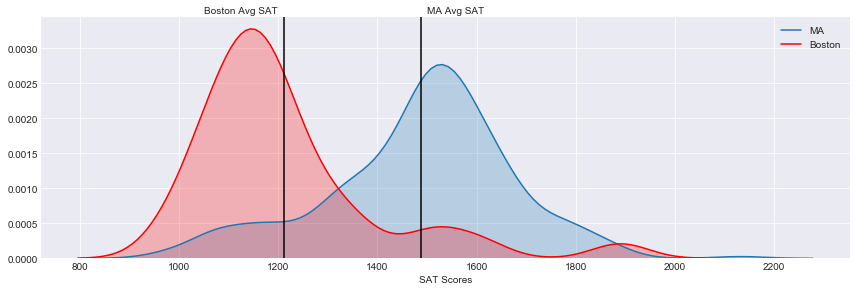

In [38]:
plt.figure(figsize=(12,4))
sns.set_style('darkgrid')

ax = sns.kdeplot(school_data["Total SAT"], shade=True,label='MA')
ax = sns.kdeplot(boston_schools['Total SAT'], shade=True, label='Boston',color='red')

plt.axvline(school_data['Total SAT'].mean(),color='black')
plt.axvline(boston_schools['Total SAT'].mean(),color='black')
plt.text(1500,.0035,'MA Avg SAT')
plt.text(1050,.0035,'Boston Avg SAT')
plt.xlabel('SAT Scores')
plt.tight_layout()


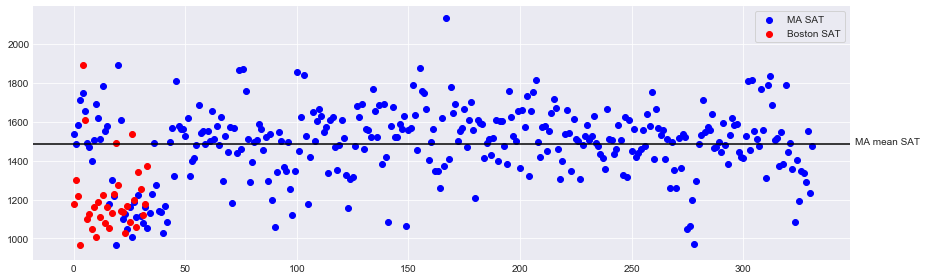

In [39]:
plt.figure(figsize=(12,4))

plt.scatter(range(332),school_data['Total SAT'],color='blue',label= 'MA SAT')
plt.scatter(range(34),boston_schools['Total SAT'],color='red',label = 'Boston SAT')

plt.axhline(school_data['Total SAT'].mean(),color='black')
plt.text(350,1486,'MA mean SAT')
plt.legend(frameon=True)
plt.tight_layout()


(array([15., 13.,  3.,  2.,  1.]),
 array([ 965., 1150., 1335., 1520., 1705., 1890.]),
 <a list of 5 Patch objects>)

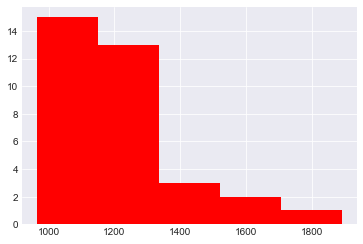

In [40]:
plt.hist(boston_schools['Total SAT'], bins=5, color='red')

Text(0.5,1,'Boston Schoools')

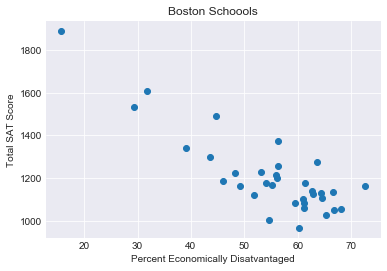

In [41]:
plt.scatter(x=boston_schools['% Economically Disadvantaged'], y= boston_schools['Total SAT'])
plt.xlabel('Percent Economically Disatvantaged')
plt.ylabel('Total SAT Score')
plt.title("Boston Schoools")

In [106]:
pd.set_option('display.expand_frame_repr', False)

#comparing 3 types of schools: Boston Latin School, Brighton High School, Edward M Kennedy
compare = boston_schools.loc[[124,127,579],:]
compare.to_excel('schools.xlsx')
compare

,School Name,School Type,Town,Zip,Grade,% First Language Not English,% English Language Learner,% Students With Disabilities,% Economically Disadvantaged,% African American,% Asian,% Hispanic,% White,"% Native Hawaiian, Pacific Islander","% Multi-Race, Non-Hispanic",% Males,% Females,Total # of Classes,Average Class Size,% Attending College,% Private Two-Year,% Private Four-Year,% Public Two-Year,% Public Four-Year,% MA Community College,% AP_Score 1-2,% AP_Score 3-5,Average SAT_Reading,Average SAT_Writing,Average SAT_Math,Average Salary,Total SAT
124,Boston Latin,Public School,Boston,2115,"07,08,09,10,11,12",32.7,3.2,2.1,15.7,8.0,29.0,12.1,46.9,0.0,3.8,45.1,54.9,790.0,25.8,94.1,0.0,59.7,1.5,38.8,1.5,17.3,82.7,629.0,614.0,647.0,88790.0,1890.0
127,Brighton High,Public School,Brighton,2135,"09,10,11,12",59.3,41.6,23.8,61.0,44.3,3.1,45.7,5.4,0.1,1.0,60.3,39.7,321.0,17.8,66.2,0.8,17.6,48.9,32.8,47.3,96.2,3.8,357.0,352.0,392.0,88790.0,1101.0
579,Edward M. Kennedy Academy for Health Careers (...,Charter School,Boston,2115,"09,10,11,12",50.7,13.6,16.4,54.0,44.6,1.9,46.8,4.5,0.0,2.2,34.3,65.7,164.0,17.1,81.8,0.0,19.4,36.1,44.4,36.1,80.6,19.4,386.0,395.0,397.0,NaN,1178.0


# Creating a Regression Model

In [43]:
X = boston_schools["% Economically Disadvantaged"].values.reshape(-1,1)
y = boston_schools['Total SAT'].values.reshape(-1,1)

#Create training and test set
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = .2, random_state=0)


#fit linear regression into the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#predicting the dependent variable(Sat Scores)
y_pred = regressor.predict(X_test)

Text(0.5,1,'Boston Schools (Test Set)')

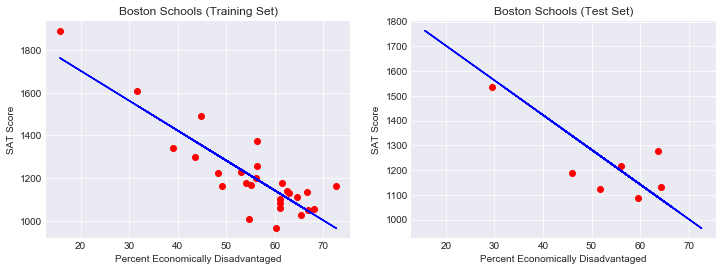

In [44]:
#visualizing the model
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.scatter(X_train, y_train , color="red")
plt.plot(X_train, regressor.predict(X_train), color="blue")
plt.xlabel('Percent Economically Disadvantaged')
plt.ylabel("SAT Score")
plt.title('Boston Schools (Training Set)')

plt.subplot(1,2,2)
plt.scatter(X_test, y_test , color="red")
plt.plot(X_train, regressor.predict(X_train), color="blue")
plt.xlabel('Percent Economically Disadvantaged')
plt.ylabel("SAT Score")
plt.title('Boston Schools (Test Set)')

In [45]:
X = school_data["% Economically Disadvantaged"].values.reshape(-1,1)
y = school_data['Total SAT'].values.reshape(-1,1)

#Create training and test set
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = .2, random_state=0)


#fit linear regression into the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#predicting the dependent variable(Sat Scores)
y_pred = regressor.predict(X_test)

Text(0.5,1,'MA Schools (Test Set)')

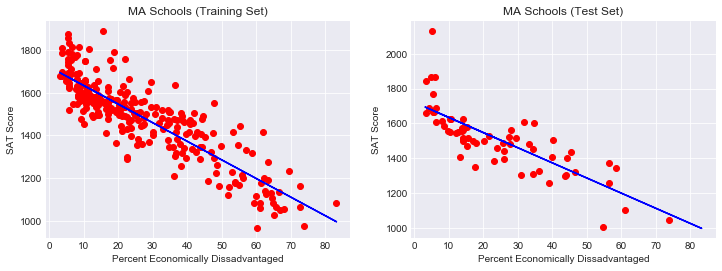

In [46]:
#visualizing the model
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.scatter(X_train, y_train , color="red")
plt.plot(X_train, regressor.predict(X_train), color="blue")
plt.xlabel("Percent Economically Dissadvantaged")
plt.ylabel("SAT Score")
plt.title('MA Schools (Training Set)')

plt.subplot(1,2,2)
plt.scatter(X_test, y_test , color="red")
plt.plot(X_train, regressor.predict(X_train), color="blue")
plt.xlabel("Percent Economically Dissadvantaged")
plt.ylabel("SAT Score")
plt.title('MA Schools (Test Set)')
